# Import Pakage

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(context="poster")

In [3]:
df = pd.read_csv('../data/air_quality.csv')
df.head()

,Time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
0,2023-01-01T00:00,6.1,3.2,145.0,9.7,0.8,50.0
1,2023-01-01T01:00,5.9,3.2,141.0,10.0,0.9,50.0
2,2023-01-01T02:00,6.0,3.4,134.0,9.4,0.9,53.0
3,2023-01-01T03:00,5.6,3.5,128.0,8.6,0.9,53.0
4,2023-01-01T04:00,5.4,3.6,126.0,7.6,0.9,54.0


In [4]:
df['Time']= pd.to_datetime(df['Time'])
df["Time"]

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
4651   2023-07-13 19:00:00
4652   2023-07-13 20:00:00
4653   2023-07-13 21:00:00
4654   2023-07-13 22:00:00
4655   2023-07-13 23:00:00
Name: Time, Length: 4656, dtype: datetime64[ns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4656 entries, 0 to 4655
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              4656 non-null   datetime64[ns]
 1   pm10              4656 non-null   float64       
 2   pm2_5             4656 non-null   float64       
 3   carbon_monoxide   4656 non-null   float64       
 4   nitrogen_dioxide  4656 non-null   float64       
 5   sulphur_dioxide   4656 non-null   float64       
 6   ozone             4656 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 254.8 KB


In [6]:
# check for dupplicate data
print(f"jumlah error adalah:\n{df.duplicated().sum()}")
print(f"jumlah error adalah:\n{df.isna().sum()}")

jumlah error adalah:
0
jumlah error adalah:
Time                0
pm10                0
pm2_5               0
carbon_monoxide     0
nitrogen_dioxide    0
sulphur_dioxide     0
ozone               0
dtype: int64


In [7]:
df.tail()

,Time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
4651,2023-07-13 19:00:00,6.7,4.6,135.0,2.8,1.2,91.0
4652,2023-07-13 20:00:00,6.6,4.7,138.0,3.3,1.1,94.0
4653,2023-07-13 21:00:00,7.4,5.1,145.0,3.4,1.2,92.0
4654,2023-07-13 22:00:00,6.9,5.0,143.0,3.8,1.2,86.0
4655,2023-07-13 23:00:00,7.5,5.7,144.0,4.3,1.4,83.0


# Exploration Data Analitiy

In [8]:
# we want to split datetime to be Date and Time
df2 = df.copy()
df2.insert(0,"Date",df2['Time'].dt.date)
df2.insert(1,'time_at',df2['Time'].dt.time)
df2.drop("Time",axis=1,inplace=True)

In [9]:
# change Date and time_at to be datetime datatype
df2["Date"] = pd.to_datetime(df2["Date"])

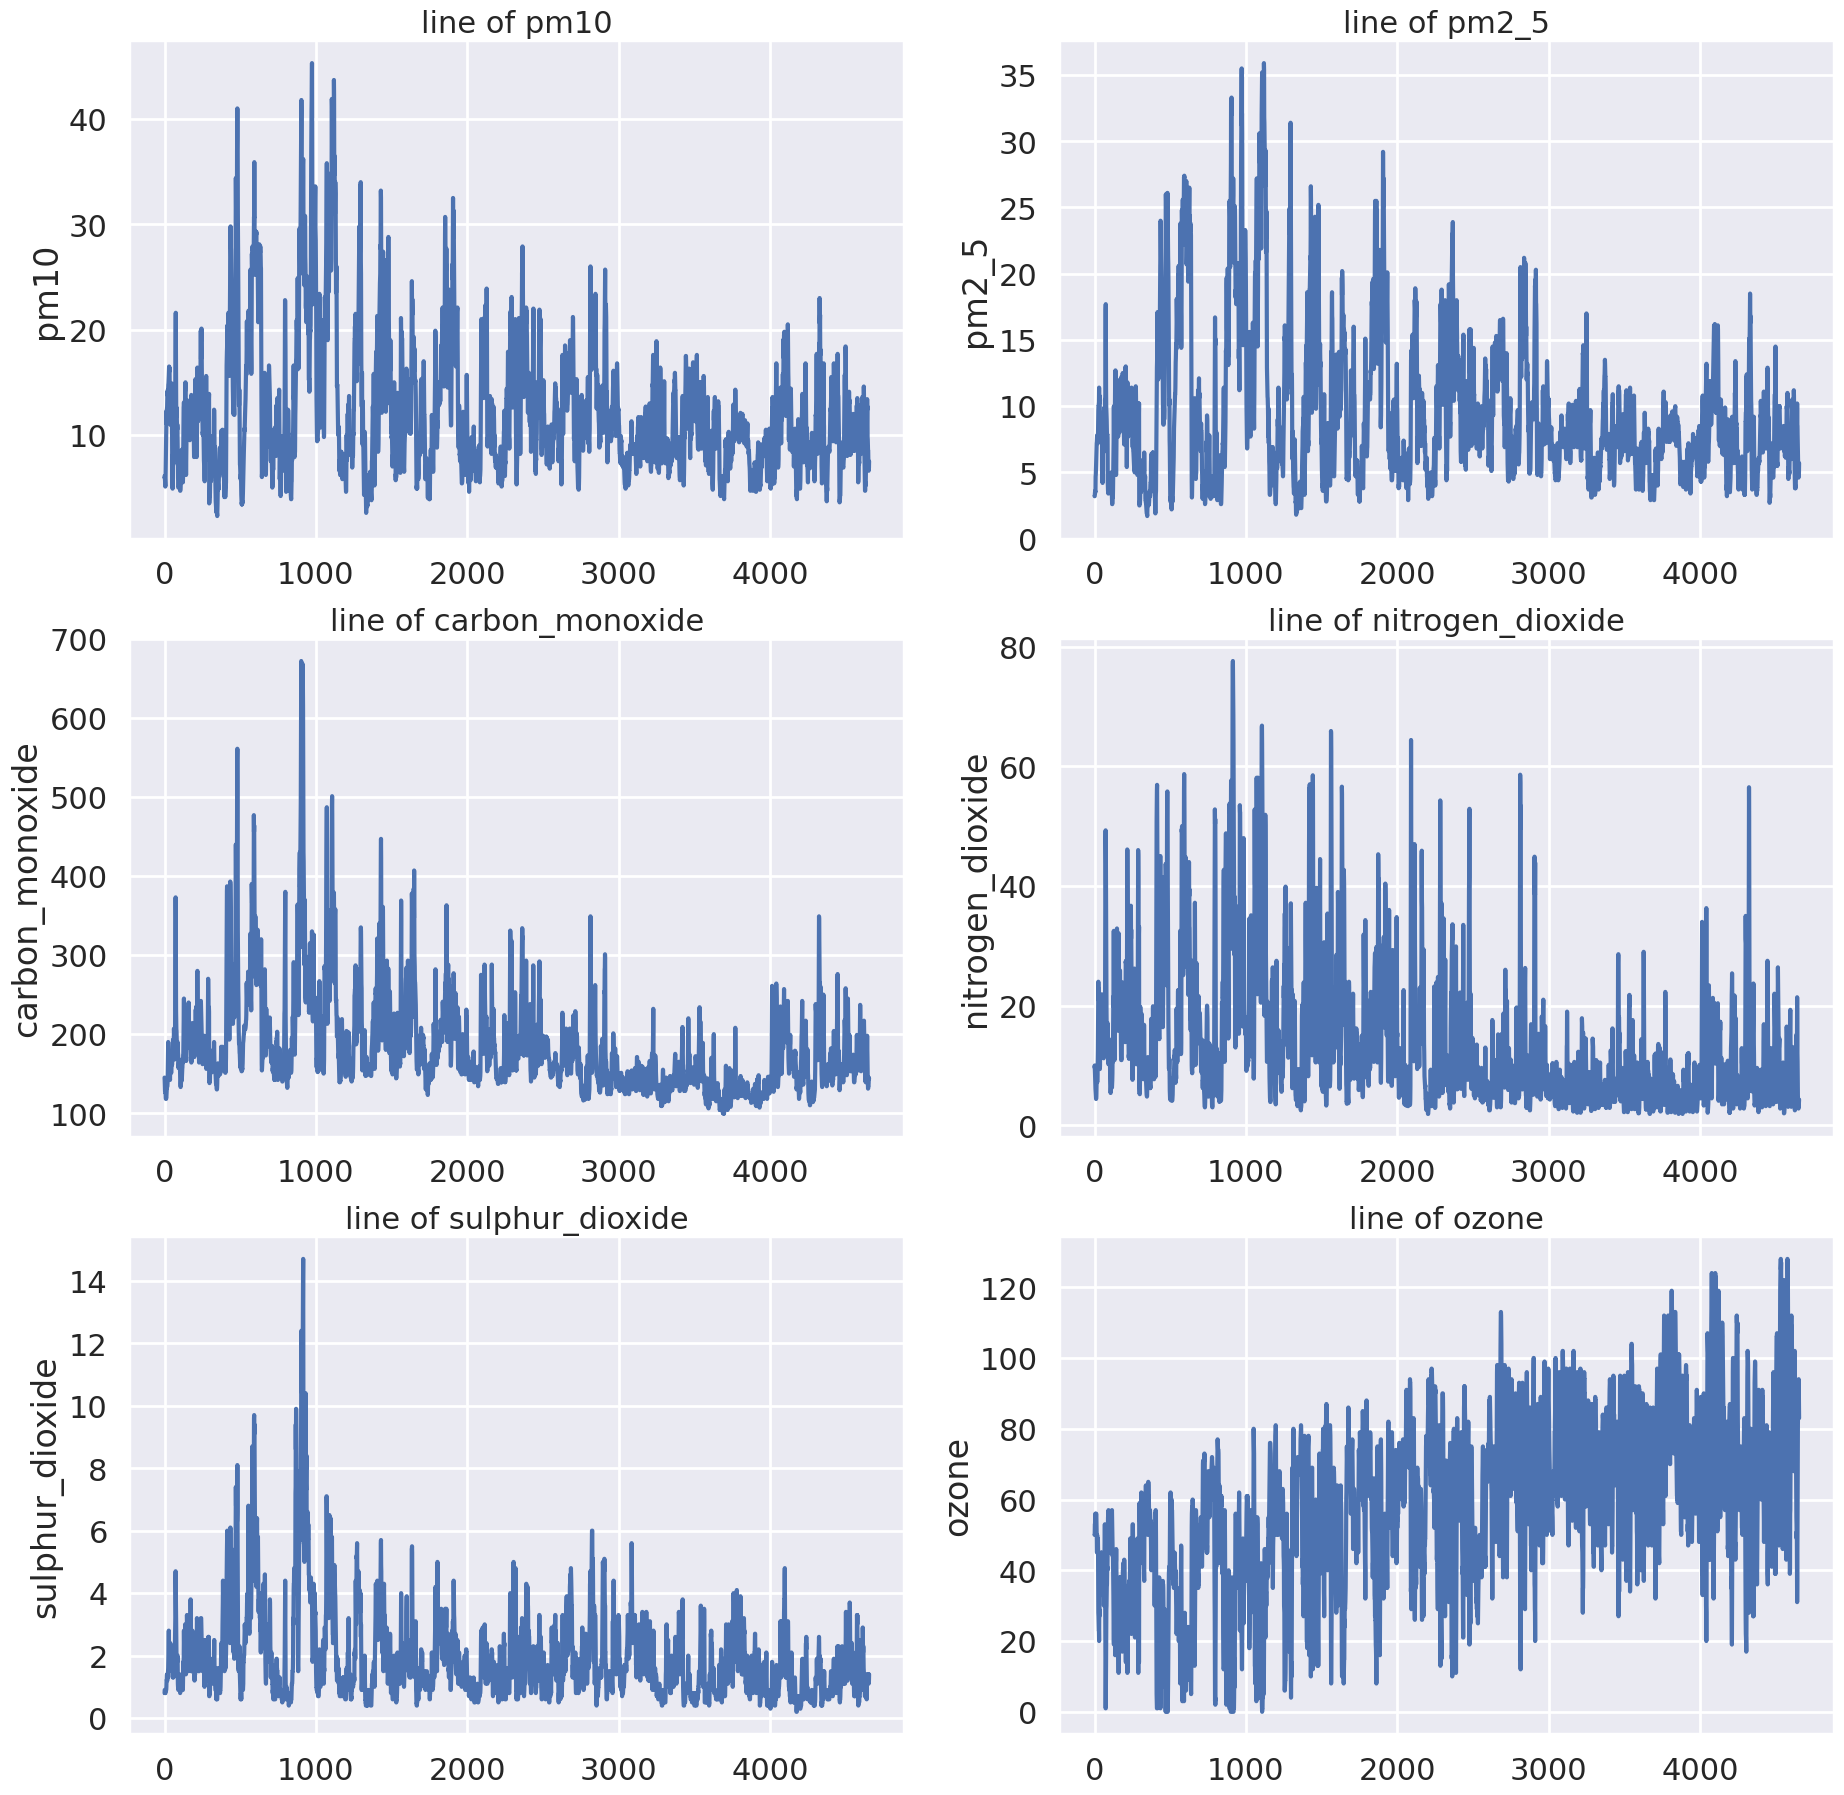

In [10]:
# to see date for pm10
continues_features = df2.drop(["Date","time_at"],axis=1)
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(22, 22))
for i, column in enumerate(continues_features.columns):
    sns.lineplot(continues_features[column],ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title("line of {}".format(column),fontsize=22)


In [11]:
df2

,Date,time_at,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
0,2023-01-01,00:00:00,6.1,3.2,145.0,9.7,0.8,50.0
1,2023-01-01,01:00:00,5.9,3.2,141.0,10.0,0.9,50.0
2,2023-01-01,02:00:00,6.0,3.4,134.0,9.4,0.9,53.0
3,2023-01-01,03:00:00,5.6,3.5,128.0,8.6,0.9,53.0
4,2023-01-01,04:00:00,5.4,3.6,126.0,7.6,0.9,54.0
...,...,...,...,...,...,...,...,...
4651,2023-07-13,19:00:00,6.7,4.6,135.0,2.8,1.2,91.0
4652,2023-07-13,20:00:00,6.6,4.7,138.0,3.3,1.1,94.0
4653,2023-07-13,21:00:00,7.4,5.1,145.0,3.4,1.2,92.0
4654,2023-07-13,22:00:00,6.9,5.0,143.0,3.8,1.2,86.0


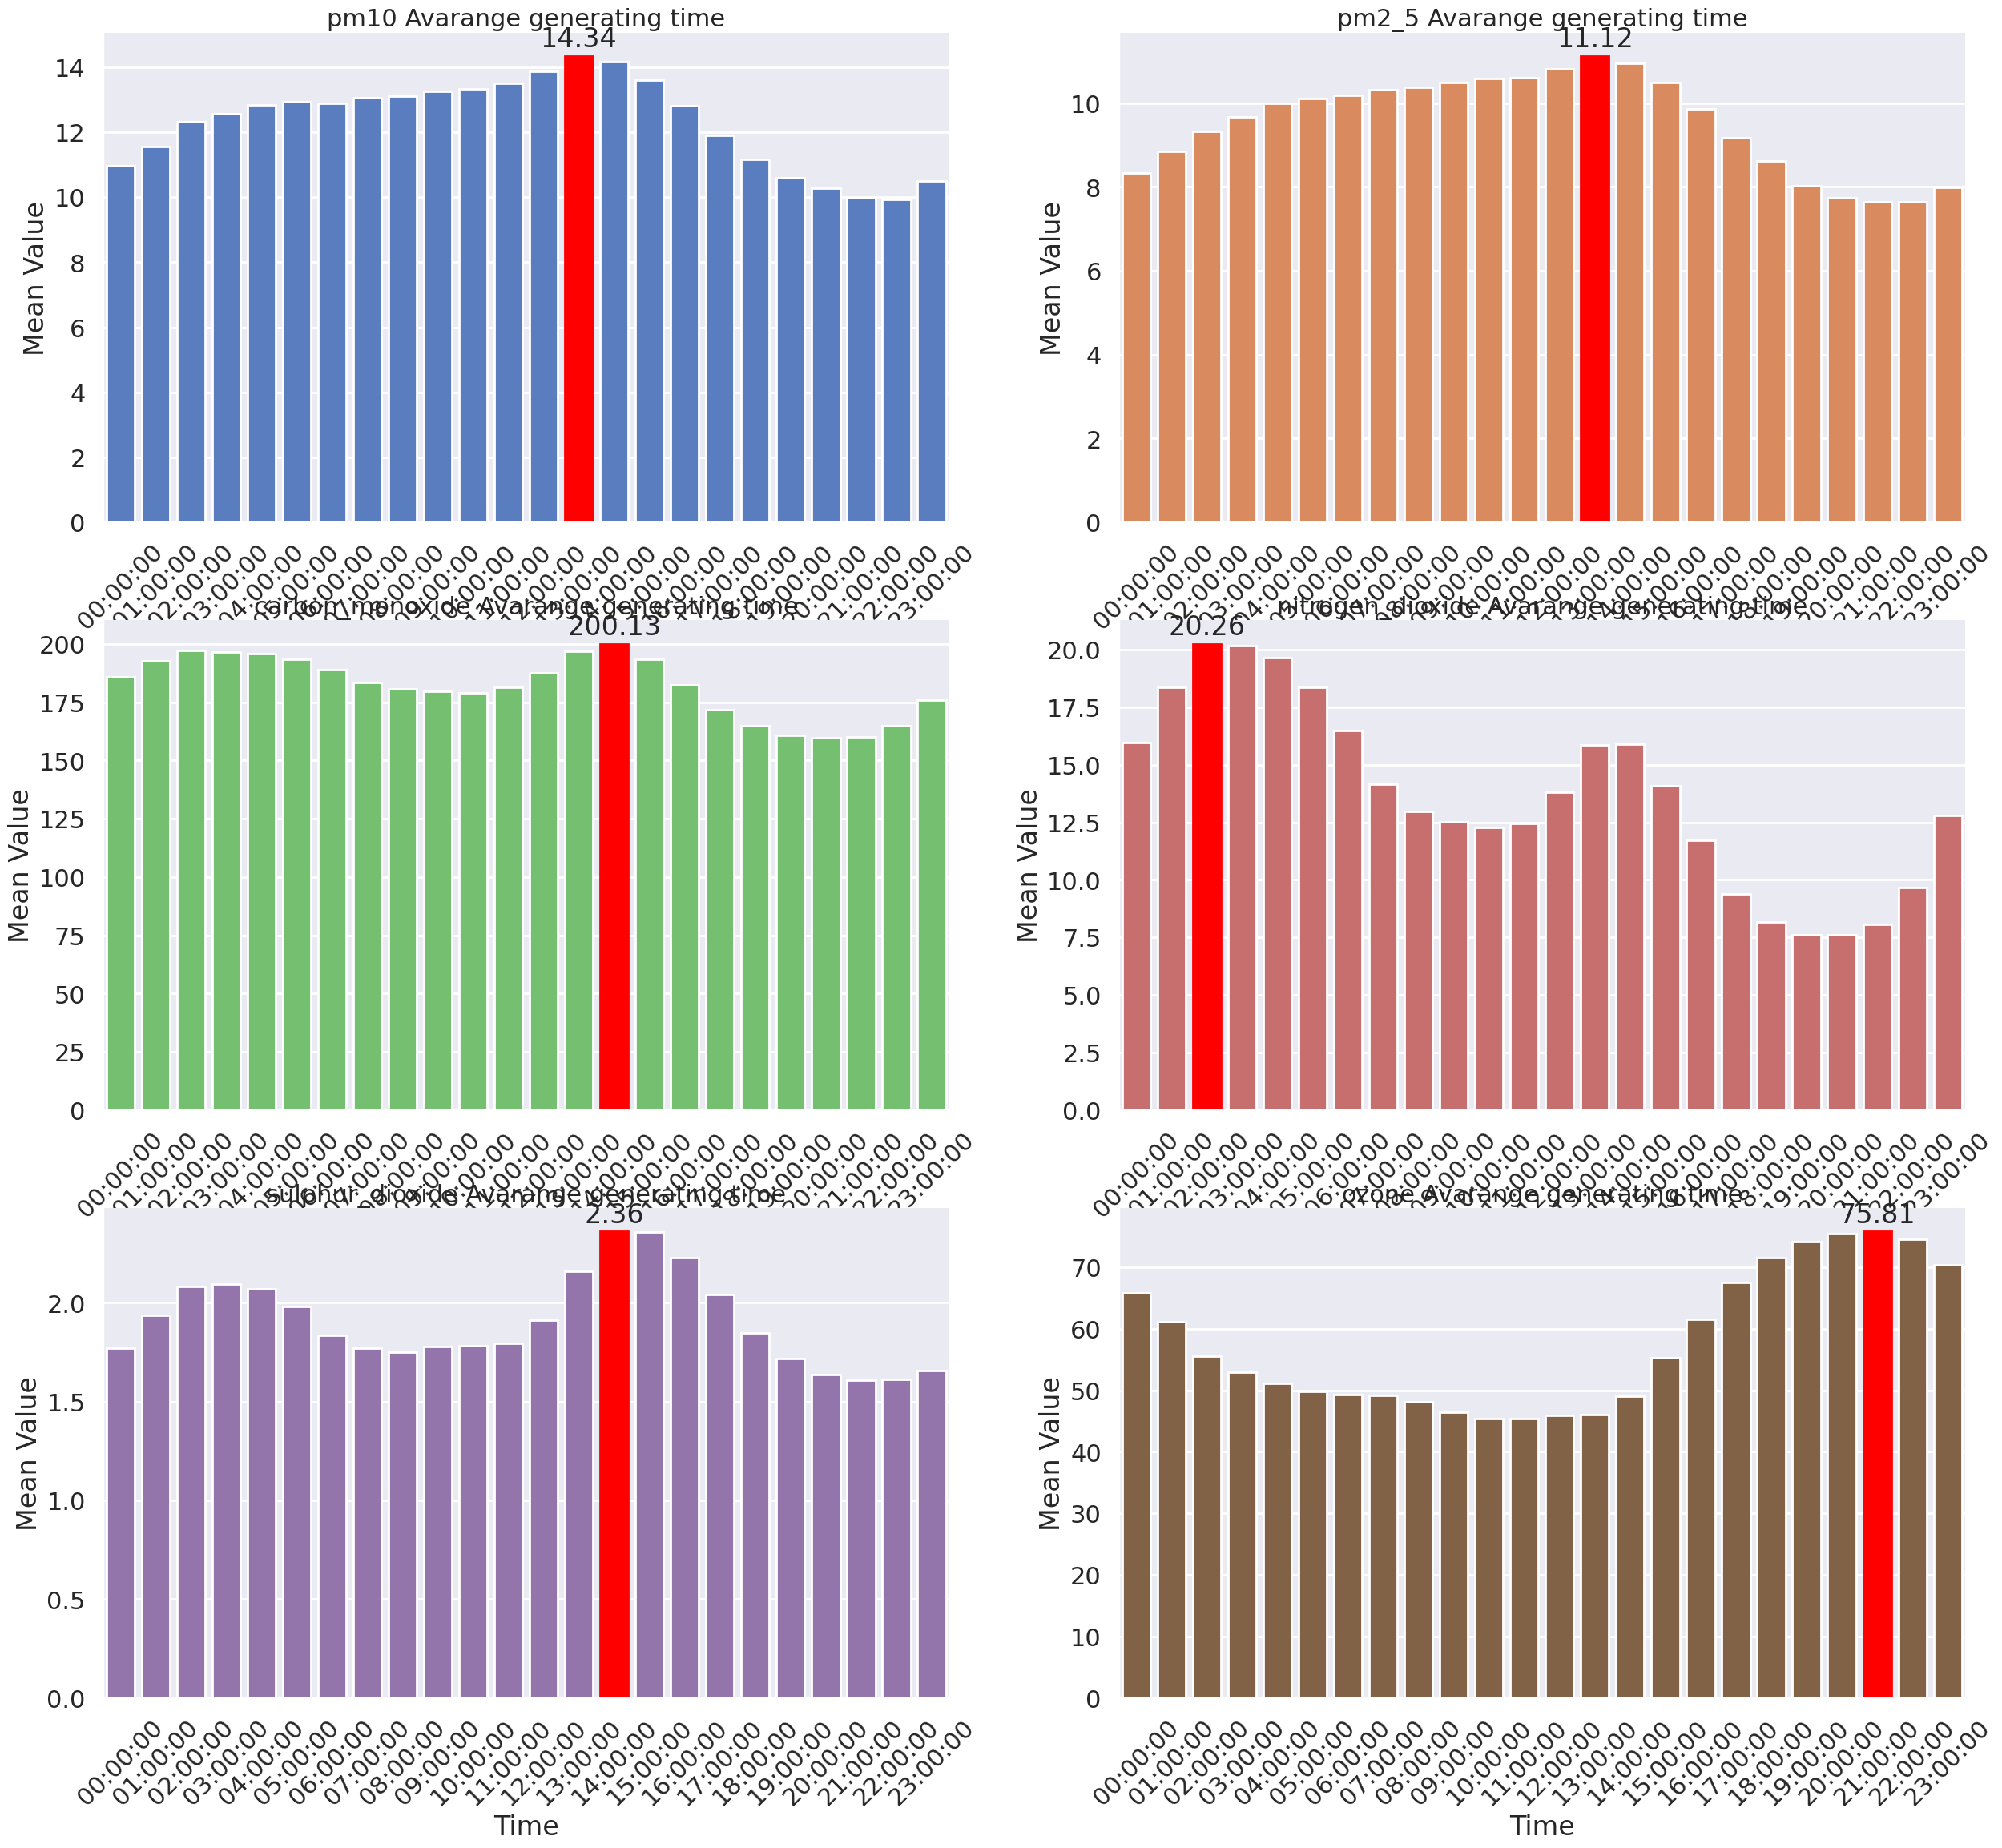

In [12]:
mean_feature = df2.groupby('time_at')[continues_features.columns].mean().reset_index()
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(30, 27))
colors = sns.color_palette("muted")
for i, column in enumerate(continues_features.columns):
    sns.barplot(x='time_at', y=column, data=mean_feature, ax=ax[i//2, i%2], color=colors[i%len(colors)])
    ax[i//2, i%2].set_title("{} Avarange generating time".format(column), fontsize=22)
    ax[i//2, i%2].set_xlabel('Time')
    ax[i//2, i%2].set_ylabel('Mean Value')
    ax[i//2, i%2].spines['top'].set_visible(False)
    ax[i//2, i%2].spines['right'].set_visible(False)
    ax[i//2, i%2].tick_params(axis='x', labelrotation=45)

    # Find maximum value and its index
    max_val = mean_feature[column].max()
    max_idx = mean_feature[mean_feature[column] == max_val]['time_at'].iloc[0]

    # Highlight and annotate the bar with maximum value
    rects = ax[i//2, i%2].containers[0]
    for rect in rects:
        if rect.get_height() == max_val:
            rect.set_color('red')
            ax[i//2, i%2].annotate(f'{max_val:.2f}', xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()), 
                                   xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()


check for forcesting max and min for daily temperature
thank for this resource https://www.kaggle.com/code/murph99/weather-prediction

# EDA for PM10

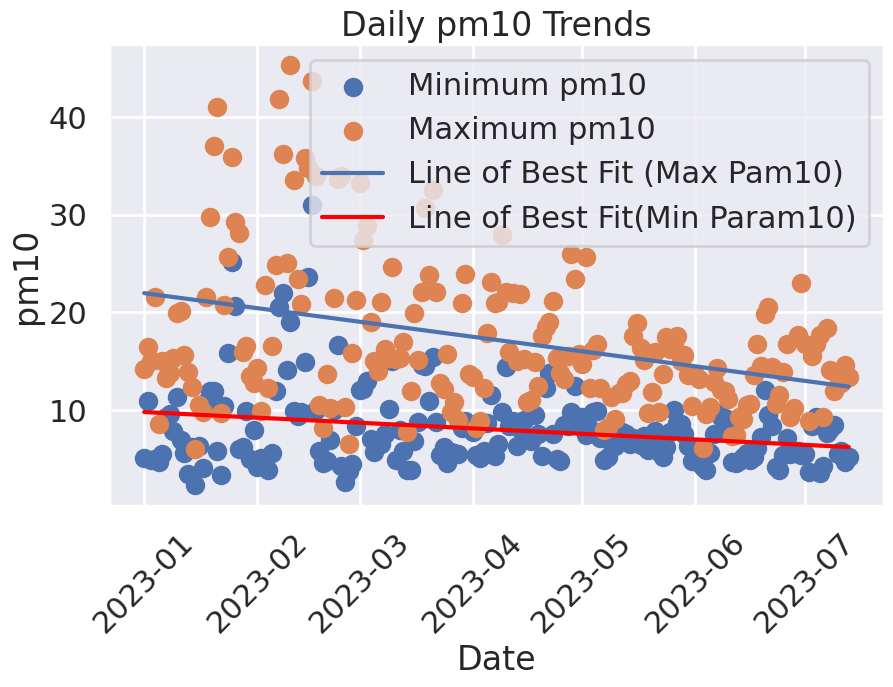

In [13]:
# calculate date min and max pm10
daily_min_max_pm10 = df2.groupby("Date")['pm10'].agg(["min",'max']).reset_index()
ref_date = daily_min_max_pm10['Date'].min()
daily_min_max_pm10['Date_Num'] = (daily_min_max_pm10['Date'] - ref_date).dt.days
# and plot the data
plt.figure(figsize=(10, 6))
plt.scatter(daily_min_max_pm10['Date'], daily_min_max_pm10['min'], label='Minimum pm10')
plt.scatter(daily_min_max_pm10['Date'], daily_min_max_pm10['max'], label='Maximum pm10')
# calculate and plot the line of best fit for maximum temperature
m_max , b_max = np.polyfit(daily_min_max_pm10['Date_Num'],daily_min_max_pm10['max'],1)
plt.plot(daily_min_max_pm10['Date'],m_max*daily_min_max_pm10['Date_Num']+b_max,color='b',label="Line of Best Fit (Max Pam10)")

# calculate and plot the line of best fit for maximum temperature
m_min , b_min = np.polyfit(daily_min_max_pm10['Date_Num'],daily_min_max_pm10['min'],1)
plt.plot(daily_min_max_pm10['Date'],m_min* daily_min_max_pm10['Date_Num'] + b_min,color='red',label="Line of Best Fit(Min Param10)")


plt.xlabel('Date')
plt.ylabel('pm10')
plt.title('Daily pm10 Trends')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Calender Heatmap of Maximum Pm10

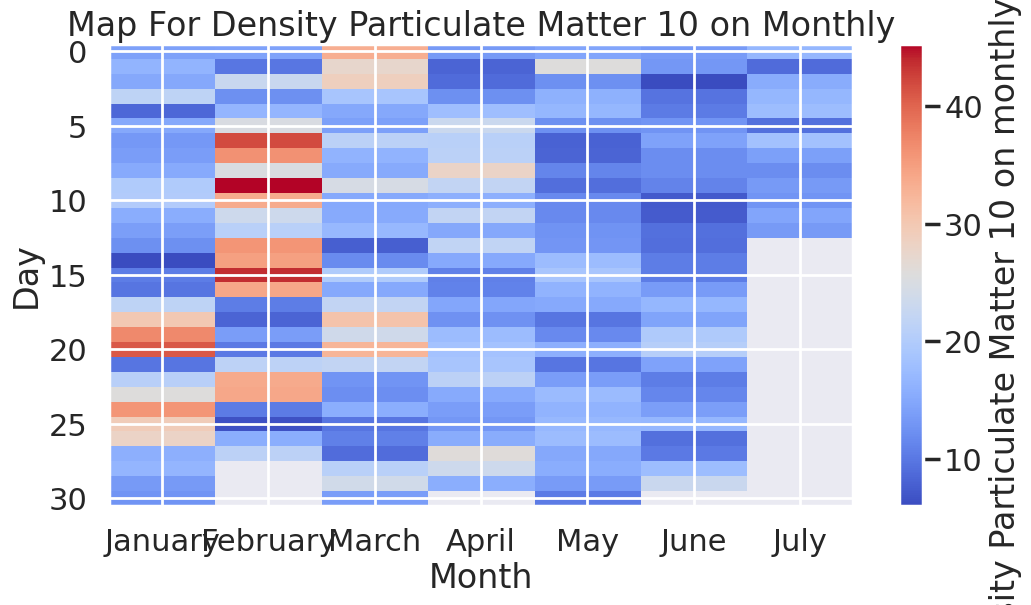

In [14]:
# calculate 
pivot_table = daily_min_max_pm10.pivot_table(values='max', index=daily_min_max_pm10['Date'].dt.day, columns=daily_min_max_pm10['Date'].dt.month, aggfunc=np.mean)
pivot_table.reset_index(inplace=True)
pivot_table.columns.name = None
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July'}
pivot_table.rename(columns=month_mapping, inplace=True)

# Create a calendar heatmap
plt.figure(figsize=(12, 6))
plt.imshow(pivot_table.iloc[:, 1:], cmap='coolwarm', aspect='auto')
plt.colorbar(label='Density Particulate Matter 10 on monthly (pm10)')
plt.title("Map For Density Particulate Matter 10 on Monthly")
plt.xlabel("Month")
plt.ylabel("Day")

# settings X-axis ticks and labels
month_ticks = range(len(month_mapping))
month_labels = list(month_mapping.values())
plt.xticks(month_ticks, month_labels)
plt.show()


## Sulfur Dioxsida Explore Analitic

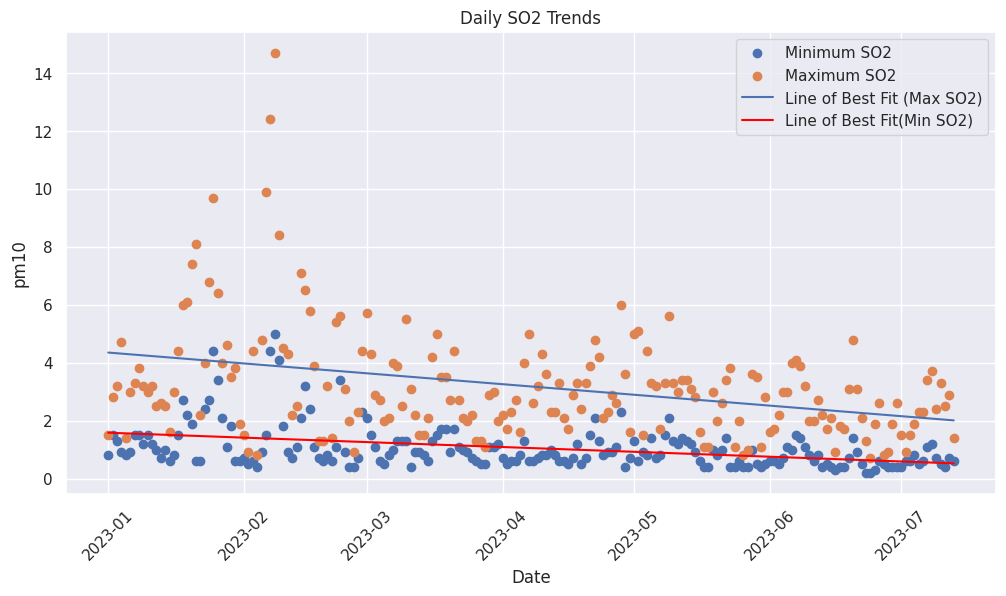

In [15]:
sns.set_theme(context="notebook")
daily_min_max_sul_diox = df2.groupby("Date")['sulphur_dioxide'].agg(["min",'max']).reset_index()
ref_date = daily_min_max_sul_diox['Date'].min()
daily_min_max_sul_diox['Date_Num'] = (daily_min_max_sul_diox['Date'] - ref_date).dt.days
# and plot the data
plt.figure(figsize=(12, 6))
plt.scatter(daily_min_max_sul_diox['Date'], daily_min_max_sul_diox['min'], label='Minimum SO2')
plt.scatter(daily_min_max_sul_diox['Date'], daily_min_max_sul_diox['max'], label='Maximum SO2')
# calculate and plot the line of best fit for maximum temperature
m_max , b_max = np.polyfit(daily_min_max_sul_diox['Date_Num'],daily_min_max_sul_diox['max'],1)
plt.plot(daily_min_max_sul_diox['Date'],m_max*daily_min_max_sul_diox['Date_Num']+b_max,color='b',label="Line of Best Fit (Max SO2)")

# calculate and plot the line of best fit for maximum temperature
m_min , b_min = np.polyfit(daily_min_max_sul_diox['Date_Num'],daily_min_max_sul_diox['min'],1)
plt.plot(daily_min_max_sul_diox['Date'],m_min* daily_min_max_sul_diox['Date_Num'] + b_min,color='red',label="Line of Best Fit(Min SO2)")


plt.xlabel('Date')
plt.ylabel('pm10')
plt.title('Daily SO2 Trends')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Model data clustering

## using PCA

In [16]:
df3 = df2.drop(['Date',"time_at"],axis=1)
df3

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
0,6.1,3.2,145.0,9.7,0.8,50.0
1,5.9,3.2,141.0,10.0,0.9,50.0
2,6.0,3.4,134.0,9.4,0.9,53.0
3,5.6,3.5,128.0,8.6,0.9,53.0
4,5.4,3.6,126.0,7.6,0.9,54.0
...,...,...,...,...,...,...
4651,6.7,4.6,135.0,2.8,1.2,91.0
4652,6.6,4.7,138.0,3.3,1.1,94.0
4653,7.4,5.1,145.0,3.4,1.2,92.0
4654,6.9,5.0,143.0,3.8,1.2,86.0


/home/kayaba/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


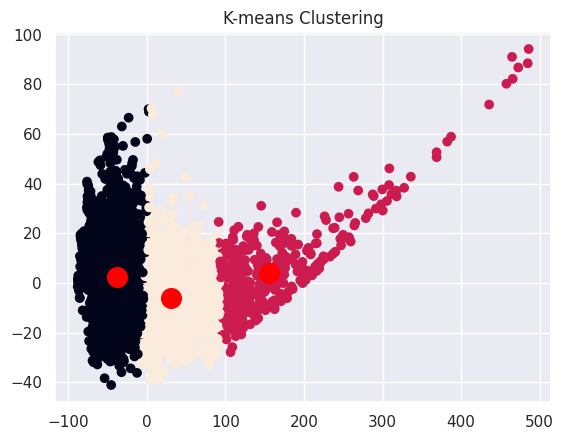

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df3.values)
pca = PCA()
train_pca = pca.fit_transform(df3.values)
# x_train,x_test = train_modeling(train_pca,test_size=0.3)
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_pca)
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');
plt.title('K-means Clustering')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score,adjusted_rand_score
inertia = kmeans.inertia_
labels = kmeans.predict(train_pca)
silhouette_avg = silhouette_score(train_pca, labels)
silhouette_avg

0.4819039649410584

# time Series analisis

## resample

In [19]:
df2.columns

Index(['Date', 'time_at', 'pm10', 'pm2_5', 'carbon_monoxide',
       'nitrogen_dioxide', 'sulphur_dioxide', 'ozone'],
      dtype='object')

Text(0.5, 1.0, 'Daily Carbon Monoxide Resample')

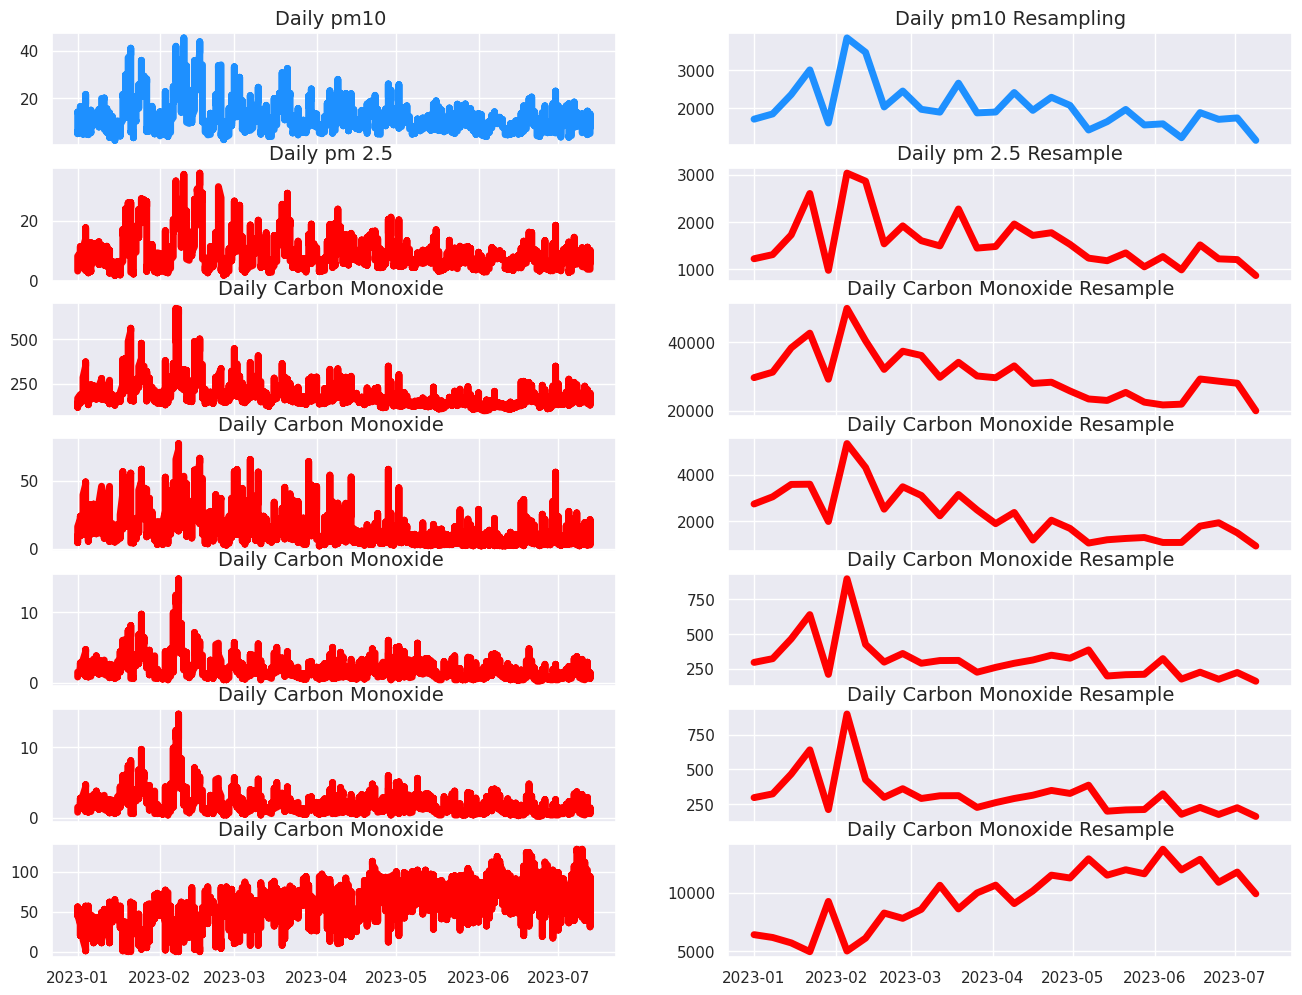

In [20]:
fig, ax = plt.subplots(ncols=2, nrows=7, sharex=True, figsize=(16,12))
ax[0, 0].plot(df2['Date'], df2['pm10'], linewidth=5, color='dodgerblue')
ax[0, 0].set_title('Daily pm10 ', fontsize=14)
resampled_df = df2[['Date','pm10']].resample('7D', on='Date').sum().reset_index(drop=False)
ax[0, 1].plot(resampled_df.Date,resampled_df.pm10,linewidth=5,color='dodgerblue')
ax[0, 1].set_title('Daily pm10 Resampling', fontsize=14)

ax[1, 0].plot(df2["Date"],df2['pm2_5'],linewidth=5,color='red')
ax[1, 0].set_title('Daily pm 2.5 ', fontsize=14)
resampled_df = df2[['Date','pm2_5']].resample('7D', on='Date').sum().reset_index(drop=False)
ax[1, 1].plot(resampled_df["Date"],resampled_df['pm2_5'],linewidth=5,color='red')
ax[1, 1].set_title('Daily pm 2.5 Resample', fontsize=14)

ax[2, 0].plot(df2["Date"],df2['carbon_monoxide'],linewidth=5,color='red')
ax[2, 0].set_title('Daily Carbon Monoxide ', fontsize=14)
resampled_df = df2[['Date','carbon_monoxide']].resample('7D', on='Date').sum().reset_index(drop=False)
ax[2, 1].plot(resampled_df["Date"],resampled_df['carbon_monoxide'],linewidth=5,color='red')
ax[2, 1].set_title('Daily Carbon Monoxide Resample', fontsize=14)

ax[3, 0].plot(df2["Date"],df2['nitrogen_dioxide'],linewidth=5,color='red')
ax[3, 0].set_title('Daily Carbon Monoxide ', fontsize=14)
resampled_df = df2[['Date','nitrogen_dioxide']].resample('7D', on='Date').sum().reset_index(drop=False)
ax[3, 1].plot(resampled_df["Date"],resampled_df['nitrogen_dioxide'],linewidth=5,color='red')
ax[3, 1].set_title('Daily Carbon Monoxide Resample', fontsize=14)

ax[4, 0].plot(df2["Date"],df2['sulphur_dioxide'],linewidth=5,color='red')
ax[4, 0].set_title('Daily Carbon Monoxide ', fontsize=14)
resampled_df = df2[['Date','sulphur_dioxide']].resample('7D', on='Date').sum().reset_index(drop=False)
ax[4, 1].plot(resampled_df["Date"],resampled_df['sulphur_dioxide'],linewidth=5,color='red')
ax[4, 1].set_title('Daily Carbon Monoxide Resample', fontsize=14)

ax[5, 0].plot(df2["Date"],df2['sulphur_dioxide'],linewidth=5,color='red')
ax[5, 0].set_title('Daily Carbon Monoxide ', fontsize=14)
resampled_df = df2[['Date','sulphur_dioxide']].resample('7D', on='Date').sum().reset_index(drop=False)
ax[5, 1].plot(resampled_df["Date"],resampled_df['sulphur_dioxide'],linewidth=5,color='red')
ax[5, 1].set_title('Daily Carbon Monoxide Resample', fontsize=14)

ax[6, 0].plot(df2["Date"],df2['ozone'],linewidth=5,color='red')
ax[6, 0].set_title('Daily Carbon Monoxide ', fontsize=14)
resampled_df = df2[['Date','ozone']].resample('7D', on='Date').sum().reset_index(drop=False)
ax[6, 1].plot(resampled_df["Date"],resampled_df['ozone'],linewidth=5,color='red')
ax[6, 1].set_title('Daily Carbon Monoxide Resample', fontsize=14)

## Stationarity

di dalam time-series models,such as such as ``ARIMA``,assume that the underlying data is stationary.
Stationary describes that the time-series has

- constant mean and mean is not time-dependent
- constant variance and variance is not time-dependent
- constant covariance and covariance is not time-dependent

The check for stationarity can be done via three different approaches:
1. visually: plot time series and check for trends or seasonality
2. basic statistics: split time series and compare the mean and variance of each partition
3. statistical test: Augmented Dickey Fuller test

Let's do the ``visual check`` first. We can see that all features except ``Temperature`` have non-constant mean and non-constant variance. Therefore, ``none of these seem to be stationary.`` However, ``Temperature`` shows strong seasonality (hot in summer, cold in winter) and therefore it is not stationary either.

In [21]:
df2.columns

Index(['Date', 'time_at', 'pm10', 'pm2_5', 'carbon_monoxide',
       'nitrogen_dioxide', 'sulphur_dioxide', 'ozone'],
      dtype='object')

<Axes: xlabel='Date', ylabel='sulphur_dioxide'>

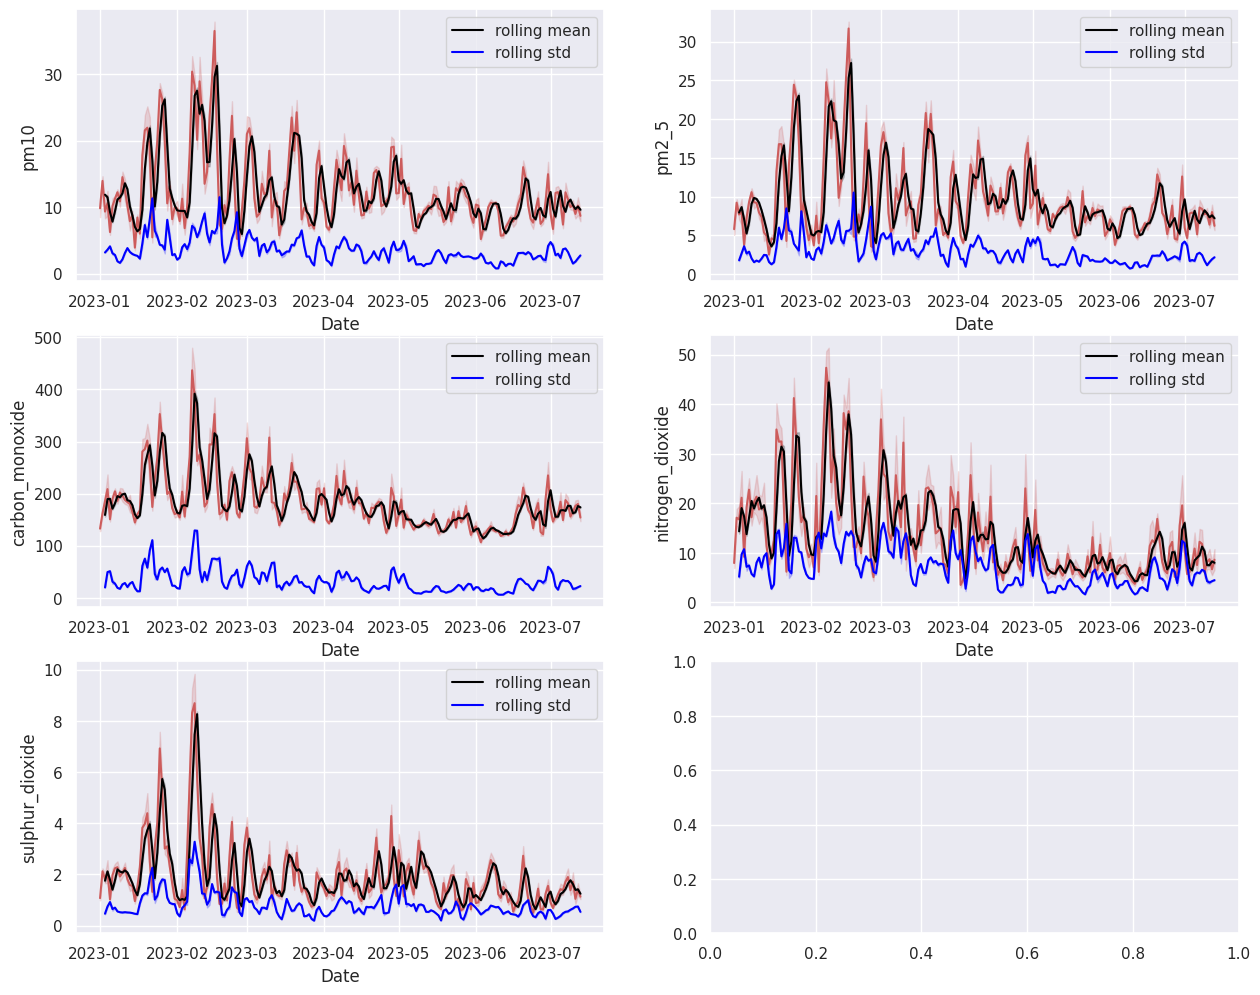

In [24]:
rolling_window = 52

f,ax = plt.subplots(nrows=3,ncols=2,figsize=(15,12))
# pm10
sns.lineplot(x=df2['Date'],y=df2['pm10'],ax=ax[0,0],color='indianred')
sns.lineplot(x=df2['Date'],y=df2['pm10'].rolling(rolling_window).mean(),ax=ax[0,0],color='black',label='rolling mean')
sns.lineplot(x=df2.Date, y=df2['pm10'].rolling(rolling_window).std(), ax=ax[0, 0], color='blue', label='rolling std')

# pm 2_5
sns.lineplot(x=df2['Date'],y=df2['pm2_5'],ax=ax[0,1],color='indianred')
sns.lineplot(x=df2['Date'],y=df2['pm2_5'].rolling(rolling_window).mean(),ax=ax[0,1],color='black',label='rolling mean')
sns.lineplot(x=df2.Date, y=df2['pm2_5'].rolling(rolling_window).std(), ax=ax[0, 1], color='blue', label='rolling std')

# carbon_monoxide
sns.lineplot(x=df2['Date'],y=df2['carbon_monoxide'],ax=ax[1, 0],color='indianred')
sns.lineplot(x=df2['Date'],y=df2['carbon_monoxide'].rolling(rolling_window).mean(),ax=ax[1, 0],color='black',label='rolling mean')
sns.lineplot(x=df2.Date, y=df2['carbon_monoxide'].rolling(rolling_window).std(), ax=ax[1, 0], color='blue', label='rolling std')

# nitrogen_dioxide
sns.lineplot(x=df2['Date'],y=df2['nitrogen_dioxide'],ax=ax[1, 1],color='indianred')
sns.lineplot(x=df2['Date'],y=df2['nitrogen_dioxide'].rolling(rolling_window).mean(),ax=ax[1, 1],color='black',label='rolling mean')
sns.lineplot(x=df2.Date, y=df2['nitrogen_dioxide'].rolling(rolling_window).std(), ax=ax[1, 1], color='blue', label='rolling std')

# sulphur_dioxide
sns.lineplot(x=df2['Date'],y=df2['sulphur_dioxide'],ax=ax[2, 0],color='indianred')
sns.lineplot(x=df2['Date'],y=df2['sulphur_dioxide'].rolling(rolling_window).mean(),ax=ax[2, 0],color='black',label='rolling mean')
sns.lineplot(x=df2.Date, y=df2['sulphur_dioxide'].rolling(rolling_window).std(), ax=ax[2, 0], color='blue', label='rolling std')

# ozone
sns.lineplot(x=df2['Date'],y=df2['ozone'],ax=ax[2, 0],color='indianred')
sns.lineplot(x=df2['Date'],y=df2['ozone'].rolling(rolling_window).mean(),ax=ax[2, 0],color='black',label='rolling mean')
sns.lineplot(x=df2.Date, y=df2['ozone'].rolling(rolling_window).std(), ax=ax[2, 0], color='blue', label='rolling std')
